In [259]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from collections import Counter
%matplotlib inline

In [260]:
df = pd.read_json('data/data.json')

# EDA

In [261]:
df.shape

(14337, 44)

In [262]:
df.head(5)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [263]:
df.describe()

,approx_payout_date,body_length,channels,delivery_method,event_created,event_end,event_published,event_start,fb_published,gts,...,org_facebook,org_twitter,sale_duration,sale_duration2,show_map,user_age,user_created,user_type,venue_latitude,venue_longitude
count,1.433700e+04,14337.000000,14337.000000,14321.000000,1.433700e+04,1.433700e+04,1.423800e+04,1.433700e+04,14337.000000,14337.000000,...,14278.000000,14278.000000,14182.000000,14337.000000,14337.000000,14337.000000,1.433700e+04,14337.000000,13261.000000,13261.000000
mean,1.350933e+09,3672.521936,6.176676,0.439564,1.345825e+09,1.350501e+09,1.340854e+09,1.350205e+09,0.127433,2430.231492,...,7.974436,4.306976,46.869694,50.576759,0.844179,374.226547,1.313492e+09,2.711097,35.221736,-59.490368
std,2.401300e+07,5758.113003,3.860333,0.591487,2.404107e+07,2.401299e+07,8.750386e+07,2.398787e+07,0.333468,9142.308260,...,11.761241,6.011520,54.825253,59.678090,0.362698,418.593616,4.152174e+07,1.606726,20.207588,66.569034
min,1.171256e+09,0.000000,0.000000,0.000000,1.170332e+09,1.170824e+09,0.000000e+00,1.170819e+09,0.000000,0.000000,...,0.000000,0.000000,-1094.000000,-1094.000000,0.000000,0.000000,1.011210e+09,1.000000,-45.045208,-159.390183
25%,1.334221e+09,750.000000,5.000000,0.000000,1.329754e+09,1.333789e+09,1.329499e+09,1.333406e+09,0.000000,116.410000,...,0.000000,0.000000,16.000000,17.000000,1.000000,13.000000,1.286824e+09,1.000000,33.959338,-96.957828
50%,1.355805e+09,1990.000000,6.000000,0.000000,1.351043e+09,1.355373e+09,1.351099e+09,1.355000e+09,0.000000,431.930000,...,0.000000,0.000000,32.000000,35.000000,1.000000,242.000000,1.316636e+09,3.000000,39.974104,-79.425579
75%,1.370646e+09,4280.000000,8.000000,1.000000,1.365346e+09,1.370214e+09,1.365478e+09,1.370048e+09,0.000000,1547.260000,...,14.000000,11.000000,59.000000,63.000000,1.000000,603.000000,1.346790e+09,3.000000,44.857040,-3.187449
max,1.523488e+09,65535.000000,13.000000,3.000000,1.382012e+09,1.523056e+09,1.381608e+09,1.418850e+09,1.000000,306293.930000,...,91.000000,34.000000,980.000000,980.000000,1.000000,3794.000000,1.381543e+09,103.000000,64.844022,176.169492


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [265]:
df['acct_type'].value_counts() 

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [266]:
df['acct_type'].unique()

array(['fraudster_event', 'premium', 'spammer_warn', 'fraudster',
       'spammer_limited', 'spammer_noinvite', 'locked', 'tos_lock',
       'tos_warn', 'fraudster_att', 'spammer_web', 'spammer'],
      dtype=object)

In [267]:
df['fraud_no_fraud'] = df['acct_type'].astype(str).str[:5] == 'fraud'

In [268]:
"Total number of Frauds: {}".format(len(df[df['fraud_no_fraud']==True]))

'Total number of Frauds: 1293'

In [269]:
"Percentage of Fraud from all Events: {}".format((len(df[df['fraud_no_fraud']==True]))/len(df))

'Percentage of Fraud from all Events: 0.09018623142916929'

In [270]:
#Read HTML from description column
sample = df.iloc[0]
HTML(sample['description'])

# Datetime Conversion

In [271]:
#dates?
# event_created         14337 non-null int64
# event_end             14337 non-null int64
# event_published       14238 non-null float64
# event_start           14337 non-null int64
# user_created          14337 non-null int64
#convert epoch time to date time stamp
df['approx_payout_date']=df['approx_payout_date'].astype("datetime64[s]")
df['event_created']=df['event_created'].astype("datetime64[s]")
df['event_end']=df['event_end'].astype("datetime64[s]")
df['event_published']=df['event_published'].astype("datetime64[s]")
df['event_start']=df['event_start'].astype("datetime64[s]")
df['user_created']=df['user_created'].astype("datetime64[s]")

In [272]:
df['user_created'].head(5)

0   2009-11-30 20:45:50
1   2010-08-04 17:26:16
2   2010-04-29 16:43:08
3   2010-09-07 14:35:02
4   2010-11-05 19:07:45
Name: user_created, dtype: datetime64[ns]

In [273]:
df['approx_payout_date'].head(5)

0   2010-02-13 12:00:00
1   2011-02-03 08:00:00
2   2011-01-28 00:00:00
3   2014-01-06 00:00:00
4   2011-02-17 00:00:00
Name: approx_payout_date, dtype: datetime64[ns]

In [274]:
#df[event_delta] is the difference in time when event was created and published
df['event_delta']=df['event_published']-df['event_created']

In [275]:
df['event_delta'].head(5)

0   4 days 06:48:52
1   0 days 00:10:25
2   0 days 00:15:52
3   0 days 00:31:16
4   0 days 00:05:00
Name: event_delta, dtype: timedelta64[ns]

In [276]:
#df[user_delta] is the difference in time between when the event_created and when the user_created
df['user_delta']=df['event_created']-df['user_created']

In [277]:
df['user_delta'].head(5)

0    36 days 04:15:56
1   149 days 04:31:34
2   214 days 11:39:28
3   889 days 00:31:08
4    34 days 20:16:41
Name: user_delta, dtype: timedelta64[ns]

In [278]:
df['event_delta'].describe()

count                        14238
mean     -58 days +11:06:46.803905
std       977 days 14:23:43.952691
min          -15981 days +12:11:31
25%         0 days 00:05:58.250000
50%         0 days 00:21:36.500000
75%         0 days 06:49:56.500000
max              600 days 20:30:38
Name: event_delta, dtype: object

In [279]:
df['user_delta'].describe()

count                       14337
mean     374 days 05:25:26.838878
std      418 days 14:17:39.638202
min               0 days 00:00:00
25%              12 days 20:37:38
50%             241 days 22:35:42
75%             602 days 23:04:46
max            3793 days 22:14:30
Name: user_delta, dtype: object

# Total Fraud/No Fraud Histogram/Count based on Hours

In [280]:
df['user_hour_delta']=df['user_delta'] / np.timedelta64(1, 'h')

Text(0,0.5,'Count of Fraud/No Fraud')

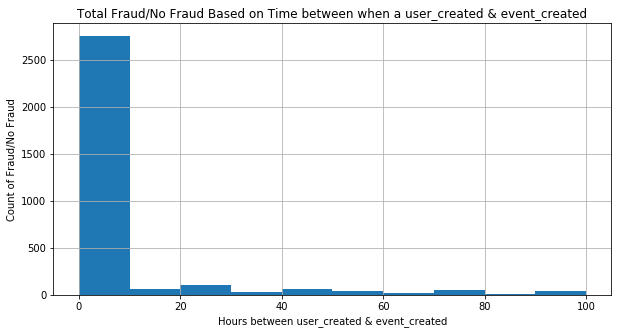

In [281]:
df['user_hour_delta'].hist(figsize=(10,5),bins=10, range=[0,100])
plt.title("Total Fraud/No Fraud Based on Time between when a user_created & event_created")
plt.xlabel("Hours between user_created & event_created")
plt.ylabel("Count of Fraud/No Fraud")

In [282]:
df['event_hour_delta']=df['event_delta'] / np.timedelta64(1, 'h')

In [283]:
df['event_min_delta']=df['event_hour_delta']*60

In [338]:
df['event_min_delta'][0]

6168.866666666667

In [315]:
df['event_min_delta'].head(5)

0    6168.866667
1      10.416667
2      15.866667
3      31.266667
4       5.000000
Name: event_min_delta, dtype: float64

Text(0,0.5,'Count of Fraud/No Fraud')

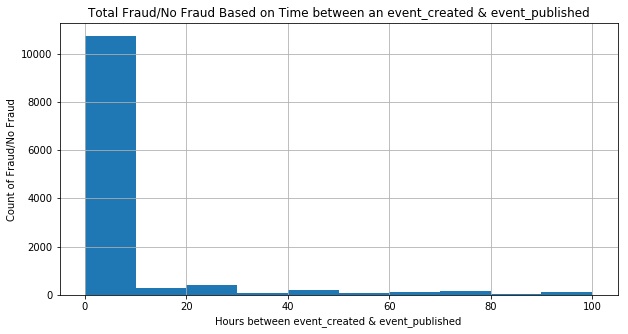

In [285]:
df['event_hour_delta'].hist(figsize=(10,5),bins=10, range=[0,100])
plt.title("Total Fraud/No Fraud Based on Time between an event_created & event_published")
plt.xlabel("Hours between event_created & event_published")
plt.ylabel("Count of Fraud/No Fraud")

In [286]:
df.head(5)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,venue_latitude,venue_longitude,venue_name,venue_state,fraud_no_fraud,event_delta,user_delta,user_hour_delta,event_hour_delta,event_min_delta
0,fraudster_event,2010-02-13 12:00:00,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,2010-01-06 01:01:46,...,25.777471,-80.133433,INK Nightclub - South Beach,FL,True,4 days 06:48:52,36 days 04:15:56,868.265556,102.814444,6168.866667
1,premium,2011-02-03 08:00:00,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,2010-12-31 21:57:50,...,32.776566,-79.930922,"The Charleston, SC area",SC,False,0 days 00:10:25,149 days 04:31:34,3580.526111,0.173611,10.416667
2,premium,2011-01-28 00:00:00,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,2010-11-30 04:22:36,...,33.944201,-118.080419,Los Angeles County Office of Education,CA,False,0 days 00:15:52,214 days 11:39:28,5147.657778,0.264444,15.866667
3,premium,2014-01-06 00:00:00,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,2013-02-12 15:06:10,...,NaN,NaN,None,None,False,0 days 00:31:16,889 days 00:31:08,21336.518889,0.521111,31.266667
4,premium,2011-02-17 00:00:00,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,2010-12-10 15:24:26,...,42.353848,-71.044276,Fish & Richardson,MA,False,0 days 00:05:00,34 days 20:16:41,836.278056,0.083333,5.000000


# Fraud Histogram/Count based on Hours

In [287]:
df_fraud=df[df['fraud_no_fraud']==True]

In [288]:
df_fraud.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,venue_latitude,venue_longitude,venue_name,venue_state,fraud_no_fraud,event_delta,user_delta,user_hour_delta,event_hour_delta,event_min_delta
0,fraudster_event,2010-02-13 12:00:00,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,2010-01-06 01:01:46,...,25.777471,-80.133433,INK Nightclub - South Beach,FL,True,4 days 06:48:52,36 days 04:15:56,868.265556,102.814444,6168.866667
26,fraudster,2011-03-08 18:00:00,870,11,US,USD,0.0,"<h1 class=""post"">Welcome</h1>\r\n<p> </p>\r\n<...",hotmail.com,2011-03-03 16:56:56,...,40.750228,-73.983714,The Setai,NY,True,0 days 00:01:22,41 days 14:30:39,998.510833,0.022778,1.366667
51,fraudster_event,2012-02-17 08:00:00,536,6,US,USD,0.0,"<p><span style=""font-size: x-large;"">Okay ever...",cox.net,2011-10-02 08:38:16,...,32.702072,-117.085088,The Jacobs Center at Market Creek,CA,True,0 days 00:09:15,76 days 05:38:22,1829.639444,0.154167,9.250000
54,fraudster,2011-08-08 00:00:00,3081,11,,GBP,0.0,"<h3><strong><strong><span style=""font-family: ...",hotmail.co.uk,2011-07-26 21:50:51,...,0.000000,0.000000,Olympia Exhibition Hall,,True,0 days 01:01:05,0 days 00:00:01,0.000278,1.018056,61.083333
70,fraudster,2011-12-03 07:00:00,0,13,US,USD,0.0,,yahoo.com,2011-09-23 16:39:02,...,39.308752,-76.716174,,MD,True,45 days 03:52:32,0 days 00:07:36,0.126667,1083.875556,65032.533333


In [289]:
less_10hours_df1=df_fraud[df_fraud['user_hour_delta']<=10]
less_10hours_df2=df_fraud[df_fraud['event_hour_delta']<=10]

In [323]:
df_nofraud_plot = df[df['fraud_no_fraud']==False]

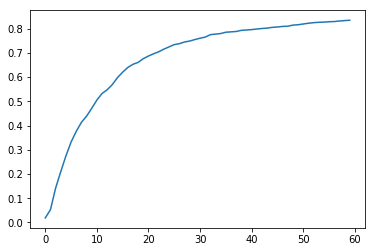

In [329]:
x_range_fraud = np.arange(60)
y_values_fraud = np.zeros(60)
total_num_frauds = 1293

for i in x_range:
    y_values_fraud[i] = len(df_fraud[df_fraud['event_min_delta']<=i])
y_values_fraud=y_values_fraud/total_num_frauds
    
plt.plot(x_range_fraud, y_values_fraud)

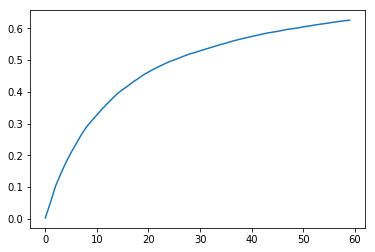

In [330]:
x_range = np.arange(60)
y_values = np.zeros(60)
total_num_no_frauds = 13044

for i in x_range:
    y_values[i] = len(df_nofraud_plot[df_nofraud_plot['event_min_delta']<=i])
y_values=y_values/total_num_no_frauds
    
plt.plot(x_range, y_values)

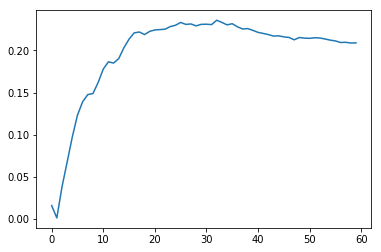

In [333]:
plt.plot(x_range, np.abs(y_values-y_values_fraud))

In [335]:
diff = np.abs(y_values-y_values_fraud)
max_diff = diff.max()
max_diff

0.23584355929707135

Text(0,0.5,'Count of Fraud')

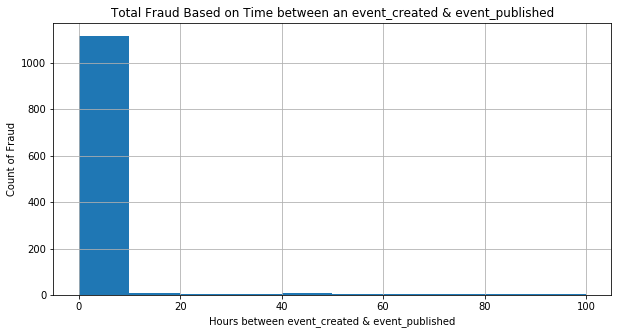

In [293]:
#This histogram tells us that around 1200 cases of fraud happens within the first 10 hours from when an event is created and when an event is published.
df_fraud['event_hour_delta'].hist(figsize=(10,5),bins=10, range=[0,100])
plt.title("Total Fraud Based on Time between an event_created & event_published")
plt.xlabel("Hours between event_created & event_published")
plt.ylabel("Count of Fraud")

In [294]:
'{} cases of fraud happen within the first 10 hours between the time an event has been created vs when it is published'.format(less_10hours_df2['event_hour_delta'].value_counts().sum())

'1140 cases of fraud happen within the first 10 hours between the time an event has been created vs when it is published'

Text(0,0.5,'Count of Fraud')

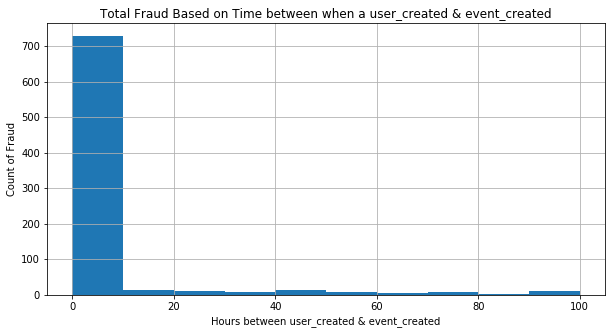

In [295]:
#This histogram tells us that around 700 cases of fraud happens within the first 10 hours from when a user creates an account and makes an event.
df_fraud['user_hour_delta'].hist(figsize=(10,5),bins=10, range=[0,100])
plt.title("Total Fraud Based on Time between when a user_created & event_created")
plt.xlabel("Hours between user_created & event_created")
plt.ylabel("Count of Fraud")

In [296]:
'{} cases of fraud happen within the first 10 hours between the time a user account has been created vs when an event was created'.format(less_10hours_df1['user_hour_delta'].value_counts().sum())

'729 cases of fraud happen within the first 10 hours between the time a user account has been created vs when an event was created'

# No Fraud Histogram/Count based on Hours

In [297]:
df_nofraud=df[df['fraud_no_fraud']==False]

In [298]:
df_nofraud.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,venue_latitude,venue_longitude,venue_name,venue_state,fraud_no_fraud,event_delta,user_delta,user_hour_delta,event_hour_delta,event_min_delta
1,premium,2011-02-03 08:00:00,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,2010-12-31 21:57:50,...,32.776566,-79.930922,"The Charleston, SC area",SC,False,00:10:25,149 days 04:31:34,3580.526111,0.173611,10.416667
2,premium,2011-01-28 00:00:00,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,2010-11-30 04:22:36,...,33.944201,-118.080419,Los Angeles County Office of Education,CA,False,00:15:52,214 days 11:39:28,5147.657778,0.264444,15.866667
3,premium,2014-01-06 00:00:00,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,2013-02-12 15:06:10,...,NaN,NaN,None,None,False,00:31:16,889 days 00:31:08,21336.518889,0.521111,31.266667
4,premium,2011-02-17 00:00:00,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,2010-12-10 15:24:26,...,42.353848,-71.044276,Fish & Richardson,MA,False,00:05:00,34 days 20:16:41,836.278056,0.083333,5.000000
5,premium,2011-03-19 01:00:00,117,6,US,USD,0.0,<p>Come join the Bluegrass Stallions as they t...,bluegrassstallions.com,2011-01-07 17:36:50,...,38.209797,-84.558831,Georgetown College Alumni Gymnasium,KY,False,00:01:02,299 days 02:31:40,7178.527778,0.017222,1.033333


In [299]:
less_10hours_nodf1=df_nofraud[df_nofraud['user_hour_delta']<=10]
less_10hours_nodf2=df_nofraud[df_nofraud['event_hour_delta']<=10]

Text(0,0.5,'Count of No Fraud')

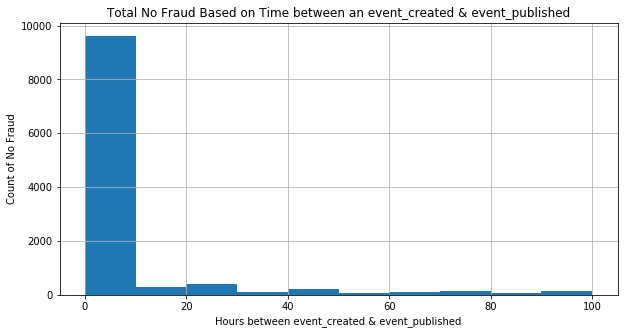

In [300]:
#This histogram tells us that around 9000 cases where fraud does not exist within the first 10 hours from when an event is created and when an event is published.
df_nofraud['event_hour_delta'].hist(figsize=(10,5),bins=10, range=[0,100])
plt.title("Total No Fraud Based on Time between an event_created & event_published")
plt.xlabel("Hours between event_created & event_published")
plt.ylabel("Count of No Fraud")

In [301]:
'{} cases of no fraud happen within the first 10 hours between the time an event has been created vs when it is published'.format(less_10hours_nodf2['event_hour_delta'].value_counts().sum())

'9646 cases of no fraud happen within the first 10 hours between the time an event has been created vs when it is published'

Text(0,0.5,'Count of No Fraud')

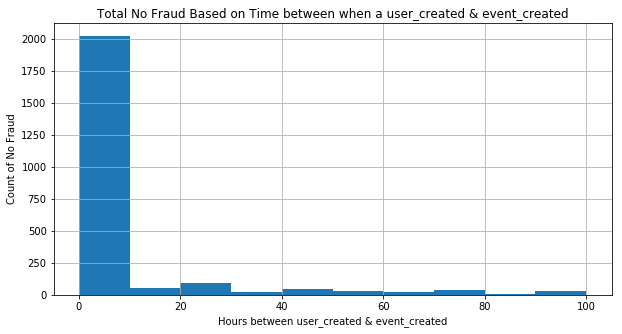

In [302]:
#This histogram tells us that around 2000 cases where fraud does not exist within the first 10 hours from when a user creates an account and makes an event.
df_nofraud['user_hour_delta'].hist(figsize=(10,5),bins=10, range=[0,100])
plt.title("Total No Fraud Based on Time between when a user_created & event_created")
plt.xlabel("Hours between user_created & event_created")
plt.ylabel("Count of No Fraud")

In [303]:
'{} cases of fraud happen within the first 10 hours between the time a user account has been created vs when an event was created'.format(less_10hours_nodf1['user_hour_delta'].value_counts().sum())

'2021 cases of fraud happen within the first 10 hours between the time a user account has been created vs when an event was created'

# Org. Name

In [304]:
"Total Number of Organizations: {}".format(len(df['org_name'].unique()))

'Total Number of Organizations: 9501'

In [305]:
list_org_names=list(df['org_name'])
counted_list = Counter(list_org_names)
# Remove the unanimous org names
N = sorted(list(counted_list.values()), reverse=True)
T = N[1:]

In [306]:
"Total Number of Events by Anonymous Organizations: {}".format(N[0])

'Total Number of Events by Anonymous Organizations: 1462'

# Org Name with Fraud

In [307]:
df_org_frad_nofraud=df[['org_name', 'fraud_no_fraud']]
df_org_frad_nofraud1=df_org_frad_nofraud[df_org_frad_nofraud['fraud_no_fraud']==True]

In [308]:
Anonymous_Org_Fraud_Cases=Counter(df_org_frad_nofraud1.iloc[:,0])

In [309]:
"Number of Frauds by Anonymous Organizations: {}".format(Anonymous_Org_Fraud_Cases[''])

'Number of Frauds by Anonymous Organizations: 446'

In [310]:
"Percentage of Frauds by Anonymous Organizations: {}".format(Anonymous_Org_Fraud_Cases['']/N[0])

'Percentage of Frauds by Anonymous Organizations: 0.30506155950752395'

### Histograms with/without Events by Anonymous Orgs

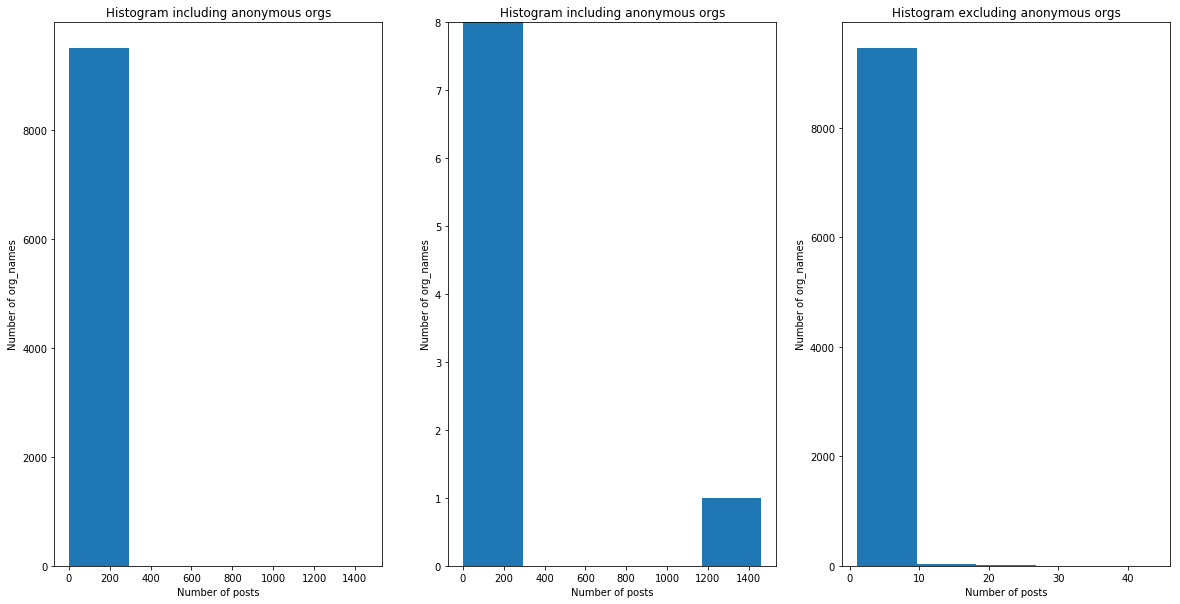

In [311]:
fig, ax = plt.subplots(1,3, figsize=(20,10))
ax[0].hist(N,bins=5);
ax[0].set_xlabel('Number of posts')
ax[0].set_ylabel('Number of org_names')
ax[0].set_title('Histogram including anonymous orgs');
ax[1].hist(N,bins=5);
ax[1].set_xlabel('Number of posts')
ax[1].set_ylabel('Number of org_names')
ax[1].set_title('Histogram including anonymous orgs');
ax[1].set_ylim (0,8)
ax[2].hist(T,bins= 5);
ax[2].set_xlabel('Number of posts')
ax[2].set_ylabel('Number of org_names')
ax[2].set_title('Histogram excluding anonymous orgs');

### Histogram for orgs with more than 2 posts & more than 3 posts

In [312]:
L2 = []
for x in T:
    if x > 2:
        L2.append(x)

In [313]:
L3 = []
for x in T:
    if x > 3:
        L3.append(x)

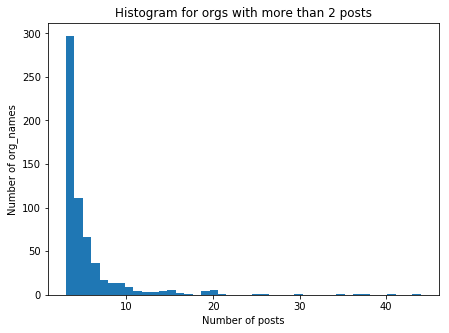

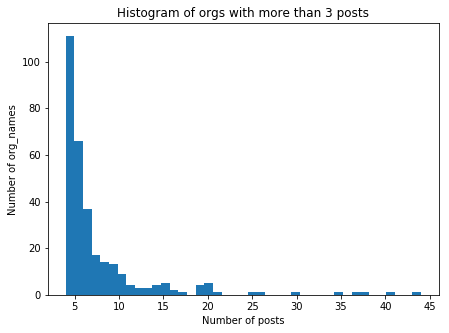

In [314]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(L2,bins=42);
plt.xlabel('Number of posts');
plt.ylabel('Number of org_names');
ax.set_title('Histogram for orgs with more than 2 posts');
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(L3,bins=41);
plt.xlabel('Number of posts');
plt.ylabel('Number of org_names');
ax.set_title('Histogram of orgs with more than 3 posts');